<a href="https://colab.research.google.com/github/tpessoa-dev/plataformas-cognitivas/blob/main/Plataformas_Azure_Face_Find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!git clone https://github.com/elthonf/azure-ml.git

Cloning into 'azure-ml'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 105 (delta 41), reused 83 (delta 24), pack-reused 0
Receiving objects: 100% (105/105), 6.01 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

     |████████████████████████████████| 66 kB 2.5 MB/s 
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 


In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json


In [4]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

# Cliente de API

In [5]:
KEY = "66d56a66628f43c4bc8f71429f29c21a" #Coloque aqui sua chave
ENDPOINT = "https://facial-17ia.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Obtém arquivos

In [11]:
imagefile01 = "./azure-ml/datasets/facial/tiago1.jpg" #Imagem com a face única
NomeDoDonoDoRosto = "Tiago" #Nome da pessoa que está na face única
imagefile02 = "./azure-ml/datasets/facial/tiago2.jpg" #Imagem com as faces a procurar

Identifica FaceIDs da imagem 01

In [12]:
with open(imagefile01, 'r+b') as w:
    detected_faces01 = face_client.face.detect_with_stream(image=w)

for face in detected_faces01:
    face_to_find = face.face_id
    print("**** [{0}] foi detectado com face id [{1}] em : {2}".format(NomeDoDonoDoRosto, face.face_id, face.face_rectangle))

**** [Tiago] foi detectado com face id [4bab5b46-8241-4771-aa87-0d7188793b44] em : {'additional_properties': {}, 'width': 136, 'height': 136, 'left': 192, 'top': 131}


Identifica FaceIDs da imagem 02

In [13]:
with open(imagefile02, 'r+b') as w:
    detected_faces02 = face_client.face.detect_with_stream(image=w)
faces_to_compare = []
for face in detected_faces02:
    faces_to_compare.append(face.face_id)
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))

#Chama API para identificar faces similares
similar_faces = face_client.face.find_similar(face_id=face_to_find, face_ids=faces_to_compare)

**** Detected face id [101e79c7-a9f4-4251-be18-45159307c852] on : {'additional_properties': {}, 'width': 46, 'height': 46, 'left': 85, 'top': 271}
**** Detected face id [da85562f-4129-4306-b555-29943c08fca6] on : {'additional_properties': {}, 'width': 46, 'height': 46, 'left': 353, 'top': 321}
**** Detected face id [d83d25a8-9f70-494d-bbc4-bf82aa658d5d] on : {'additional_properties': {}, 'width': 44, 'height': 44, 'left': 790, 'top': 250}
**** Detected face id [252307fa-9e95-4d65-a100-9ad237136410] on : {'additional_properties': {}, 'width': 42, 'height': 42, 'left': 741, 'top': 253}
**** Detected face id [8e726236-b4c0-4bb5-a7f4-fe36c3e90598] on : {'additional_properties': {}, 'width': 39, 'height': 39, 'left': 189, 'top': 250}
**** Detected face id [95d8cd4e-0ddb-444d-983d-6b338137c065] on : {'additional_properties': {}, 'width': 37, 'height': 37, 'left': 289, 'top': 251}
**** Detected face id [a25664de-e2e8-4fe2-8e39-ddd935687482] on : {'additional_properties': {}, 'width': 37, 'hei

In [14]:
if not similar_faces[0]:
    print('Sem rostos similares na segunda imagem.')
else:
    for similar in similar_faces:
        print("Face [{0}] similar à face [{1}] com {2} de confiança.".format( face_to_find, similar.face_id, similar.confidence))
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    img = Image.open(imagefile02)
    draw = ImageDraw.Draw(img)
    for face in detected_faces02: #Loop de todas as faces na foto 2
        if face.face_id in list(map(lambda x: x.face_id, similar_faces)): #Se a face estiver entre as similares
            draw.rectangle(xy=getRectangle(face), outline='red')
            draw.text(xy=(face.face_rectangle.left, face.face_rectangle.top + face.face_rectangle.height),
                      text=NomeDoDonoDoRosto,
                      fill="red")


Face [4bab5b46-8241-4771-aa87-0d7188793b44] similar à face [35ba131b-3df7-458a-9db7-dfcc4fa095b6] com 0.61926925 de confiança.


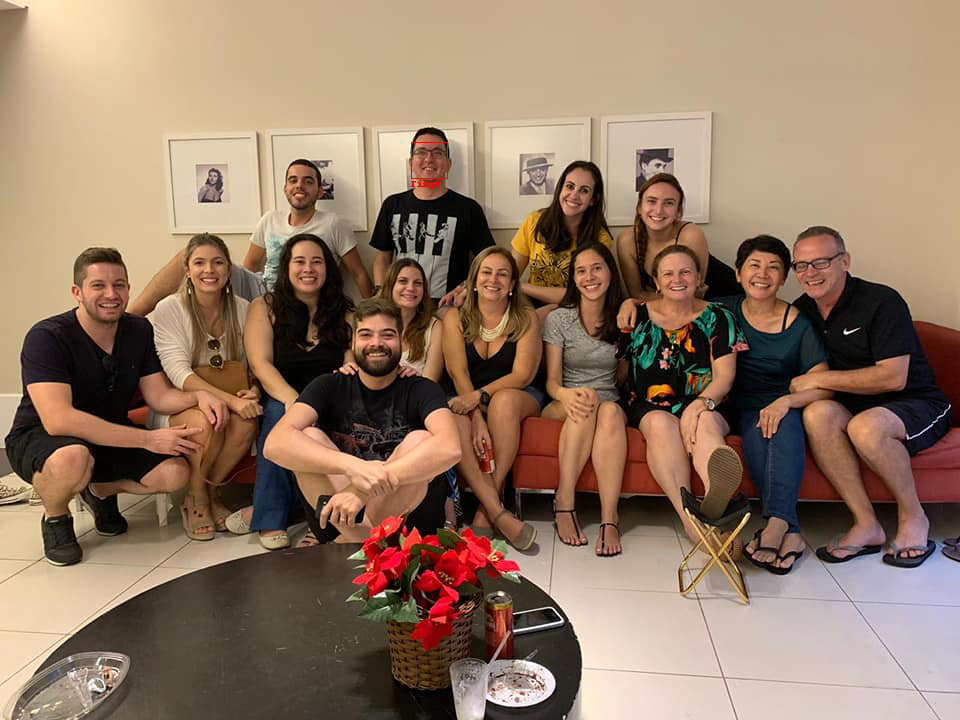

In [15]:
img